# Previous application: EDA

# 1. Reading the data

In [1]:
# loading libraries and reading the data
import pandas as pd # package for high-performance, easy-to-use data structures and data analysis
import numpy as np # fundamental package for scientific computing with Python
import matplotlib
import matplotlib.pyplot as plt # for plotting
import seaborn as sns

In [2]:
#Read the CSV file and store it as a dataframe(df). 
# Note: Please make sure that the csv file is in the same path as the python notebook.
previous_application = pd.read_csv("previous_application.csv")

In [3]:
print('Size of previous_application data', previous_application.shape)

Size of previous_application data (1670214, 37)


# 2. Checking the data

Lets view the data first:

In [4]:
# Printing the top 5 rows
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


Check how many columns we are dealing with here:

In [5]:
# Prining all the columns of the dataframe
previous_application.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)

### 2.1 Check for missing data

In [6]:
# finding all the missing data and summing them based on each column and storing it in a dataframe
total = previous_application.isnull().sum().sort_values(ascending = False)
# Finding the percentage of the missing data by diving the number of missing values with total and  storing it in a dataframe
percent = (previous_application.isnull().sum()/previous_application.isnull().count()*100).sort_values(ascending = False)
# Concatinating both the above df's
missing_previous_application_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# Printing the data
missing_previous_application_data.head(15)

,Total,Percent
RATE_INTEREST_PRIVILEGED,1664263,99.643698
RATE_INTEREST_PRIMARY,1664263,99.643698
RATE_DOWN_PAYMENT,895844,53.636480
AMT_DOWN_PAYMENT,895844,53.636480
NAME_TYPE_SUITE,820405,49.119754
DAYS_TERMINATION,673065,40.298129
NFLAG_INSURED_ON_APPROVAL,673065,40.298129
DAYS_FIRST_DRAWING,673065,40.298129
DAYS_FIRST_DUE,673065,40.298129
DAYS_LAST_DUE_1ST_VERSION,673065,40.298129


As we can see, there are ***4*** columns which have more than <font color='red'>***50%*** data missing</font>. 

We are keeping ***```50%```*** as the ***```threshold```*** and so all those columns which have <font color='red'>***missing values***</font> more than or equal to ***50%*** will be ***dropped** since performing analysis on these does not make sense.

Below code is to remove the columns having more than 50% missing values.

In [7]:
previous_application = previous_application.loc[:,previous_application.isnull().sum()/previous_application.shape[0]*100<50]
print(previous_application.shape)
previous_application.head()

(1670214, 33)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


Now, upon further checking the data, we can see that there are columns having values like ***XAP and XNA***. We will assume that these values are those where the ```data could not be captured``` and will treat them as <font color='red'>***missing values***</font> as well.

- We will have to check what is the percentage of the values XAP in each columns
- We will have to check what is the percentage of the values XNA in each columns

In [8]:
# finding the count of XNA string in all columns and storing the same in a new df
df = previous_application.eq('XNA').sum().to_frame().T
# creating a new column in the dataframe and storing the count of XAP of each column
df.loc['Count_of_XAP'] = previous_application.eq('XAP').sum()
# storing the total values of each column in a new column
df.loc['Total'] = previous_application.count()
# renaming the index name
df = df.rename(index={0: "Count_of_XNA"})
# Calculating the sum of XNA and XAP values
df.loc['SUM_XNA_XAP'] = df.loc['Count_of_XAP'] + df.loc['Count_of_XNA']
# finding the percentage of the XNA and XAP values
df.loc['Percent'] = df.loc['SUM_XNA_XAP']/df.loc['Total'] * 100
# transposing the dataframe for better viewing
df = df.T
# soring the values based on the Percentage
df = df.sort_values(by="Percent",ascending = False)
# removing the unnecessary columns
df = df.iloc[:,[3,4]]
# fining all columns where the Percentage of XNA and XAP is more than 0
df = df.loc[df['Percent'] > 0, :]
# Printing the df
df

C:\Users\ggahlot\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,SUM_XNA_XAP,Percent
NAME_CASH_LOAN_PURPOSE,1600579.0,95.830774
CODE_REJECT_REASON,1358337.0,81.327123
NAME_PRODUCT_TYPE,1063666.0,63.684414
NAME_GOODS_CATEGORY,950809.0,56.927376
NAME_SELLER_INDUSTRY,855720.0,51.234153
NAME_PAYMENT_TYPE,627384.0,37.563091
NAME_YIELD_GROUP,517215.0,30.966990
NAME_PORTFOLIO,372230.0,22.286366
NAME_CLIENT_TYPE,1941.0,0.116213
NAME_CONTRACT_TYPE,346.0,0.020716


As we can see, there are ***5*** columns which have more than <font color='red'>***50%***</font> data as either ***XNA or XAP***. 

We are now taking a decision to <font color='red'>Remove these Columns</font> from our analysis since data is half complete.

We are now taking all the relevant columns on which we will perform further analysis

In [9]:
# Storing only the relevant columns from the original dataframe for further alalysis.
previous_application = previous_application.loc[:,['SK_ID_CURR',
                        'SK_ID_PREV',
                        'NAME_CONTRACT_STATUS',
                        'NAME_CONTRACT_TYPE',
                        'WEEKDAY_APPR_PROCESS_START',
                        'HOUR_APPR_PROCESS_START',
                        'NAME_PAYMENT_TYPE',
                        'NAME_TYPE_SUITE',
                        'NAME_CLIENT_TYPE',
                        'NAME_PORTFOLIO',
                        'NAME_YIELD_GROUP',
                        'CHANNEL_TYPE',
                        'AMT_CREDIT',
                        'AMT_ANNUITY',
                        'AMT_GOODS_PRICE'
                        ]]
print(previous_application.shape)
previous_application.head()

(1670214, 15)


,SK_ID_CURR,SK_ID_PREV,NAME_CONTRACT_STATUS,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NAME_PAYMENT_TYPE,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_PORTFOLIO,NAME_YIELD_GROUP,CHANNEL_TYPE,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
0,271877,2030495,Approved,Consumer loans,SATURDAY,15,Cash through the bank,NaN,Repeater,POS,middle,Country-wide,17145.0,1730.430,17145.0
1,108129,2802425,Approved,Cash loans,THURSDAY,11,XNA,Unaccompanied,Repeater,Cash,low_action,Contact center,679671.0,25188.615,607500.0
2,122040,2523466,Approved,Cash loans,TUESDAY,11,Cash through the bank,"Spouse, partner",Repeater,Cash,high,Credit and cash offices,136444.5,15060.735,112500.0
3,176158,2819243,Approved,Cash loans,MONDAY,7,Cash through the bank,NaN,Repeater,Cash,middle,Credit and cash offices,470790.0,47041.335,450000.0
4,202054,1784265,Refused,Cash loans,THURSDAY,9,Cash through the bank,NaN,Repeater,Cash,high,Credit and cash offices,404055.0,31924.395,337500.0


### 2.2 Checking the datatypes of the newly created dataframe

In [10]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 15 columns):
SK_ID_CURR                    1670214 non-null int64
SK_ID_PREV                    1670214 non-null int64
NAME_CONTRACT_STATUS          1670214 non-null object
NAME_CONTRACT_TYPE            1670214 non-null object
WEEKDAY_APPR_PROCESS_START    1670214 non-null object
HOUR_APPR_PROCESS_START       1670214 non-null int64
NAME_PAYMENT_TYPE             1670214 non-null object
NAME_TYPE_SUITE               849809 non-null object
NAME_CLIENT_TYPE              1670214 non-null object
NAME_PORTFOLIO                1670214 non-null object
NAME_YIELD_GROUP              1670214 non-null object
CHANNEL_TYPE                  1670214 non-null object
AMT_CREDIT                    1670213 non-null float64
AMT_ANNUITY                   1297979 non-null float64
AMT_GOODS_PRICE               1284699 non-null float64
dtypes: float64(3), int64(3), object(9)
memory usage: 191.1+ MB


We find few attributes with <font color='red'>wrong</font> data types. Here is our solution to this :-

***SK_ID_CURR and SK_ID_PREV*** is ```unique``` for every application and it should be unorded categorical; therefore changing it to ```object```.
***NAME_CONTRACT_STATUS*** is actually corresponding to whether the applicant loan was approved or not; which shows it has ***4*** categories. Therefore, changing it to ```category```.

In [11]:
# Changing the datatype of SK_ID_CURR to object
previous_application.SK_ID_CURR = previous_application.SK_ID_CURR.astype('object')

# Changing the datatype of SK_ID_PREV to object
previous_application.SK_ID_PREV = previous_application.SK_ID_PREV.astype('object')

# Changing the datatype of NAME_CONTRACT_STATUS to category
previous_application.NAME_CONTRACT_STATUS = previous_application.NAME_CONTRACT_STATUS.astype('category')

# Checking the df now
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 15 columns):
SK_ID_CURR                    1670214 non-null object
SK_ID_PREV                    1670214 non-null object
NAME_CONTRACT_STATUS          1670214 non-null category
NAME_CONTRACT_TYPE            1670214 non-null object
WEEKDAY_APPR_PROCESS_START    1670214 non-null object
HOUR_APPR_PROCESS_START       1670214 non-null int64
NAME_PAYMENT_TYPE             1670214 non-null object
NAME_TYPE_SUITE               849809 non-null object
NAME_CLIENT_TYPE              1670214 non-null object
NAME_PORTFOLIO                1670214 non-null object
NAME_YIELD_GROUP              1670214 non-null object
CHANNEL_TYPE                  1670214 non-null object
AMT_CREDIT                    1670213 non-null float64
AMT_ANNUITY                   1297979 non-null float64
AMT_GOODS_PRICE               1284699 non-null float64
dtypes: category(1), float64(3), int64(1), object(10)
memory usage: 180.0+

Now we can see that all the columns have the correct data type.

### 2.3 Detecting the Outliers

Since we have numerical columns in the dataframe, it is important for us to figure out if the data contains any outliers or not. If so, then we would have to either remove them or impute them so that the analysis is performed accurately.

Let's look at the numerical attributes for the ```outlier detection``` using ***box plots***.

In [12]:
# Finding all the numerical columns in the dataset. 
numCols = previous_application.select_dtypes(include=['int64','float'])
print(numCols.columns)

Index(['HOUR_APPR_PROCESS_START', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE'],
      dtype='object')


As we can see there are ***4*** columns which contains numerical data. Checking for outliers in all of them.

##### 2.3.1 Considering HOUR_APPR_PROCESS_START

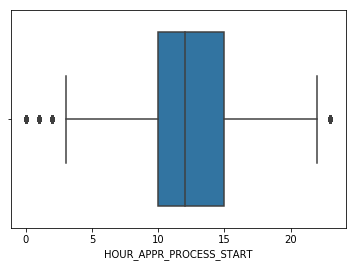

In [13]:
# printing the box plot for HOUR_APPR_PROCESS_START
sns.boxplot(previous_application.HOUR_APPR_PROCESS_START)

This is weird to know that few people fill up the loan applications in early morning and late nights also (before 5 AM and after 8 PM). 

We decide to ```replace the outliers``` in this case with the ```whisker values```. 

    - Lower value outliers are replaced with the lower whisker value and upper value outliers are replaced with the upper whisker value.

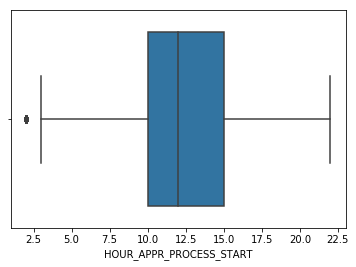

In [14]:
# Writing a function to replace the values
def standardizeHour(x):
    if x<lowerWhisker:
        return lowerWhisker
    elif x> upperWhisker:
        return upperWhisker
    else:
        return x    
quantiles = previous_application.HOUR_APPR_PROCESS_START.quantile([0.25,0.75])
IQR = quantiles.values[1] - quantiles.values[0]
lowerWhisker = int( quantiles.values[0]-1.5*IQR )
upperWhisker = int( quantiles.values[1]+1.5*IQR )
previous_application.HOUR_APPR_PROCESS_START = previous_application.HOUR_APPR_PROCESS_START.apply(lambda x : standardizeHour(x))
sns.boxplot(previous_application.HOUR_APPR_PROCESS_START)

We have capped the loan application hours from ```3 in the morning to 10 in the night```.

##### 2.3.2 Considering AMT_CREDIT, AMT_ANNUITY,AMT_GOODS_PRICE

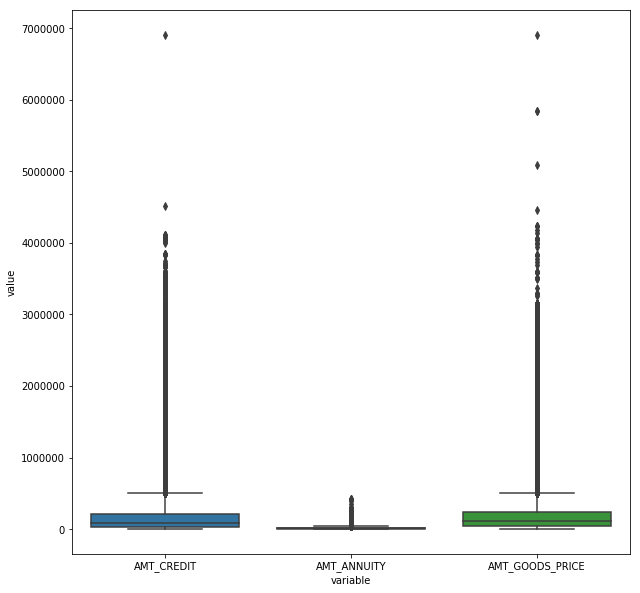

In [15]:
#Pulling the remaining 3 columns in a new df and creating a box plot
amt = numCols.loc[:,['AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE']]
plt.figure(figsize = (10,10))
# plotting the box plot
sns.boxplot(x="variable", y="value", data=pd.melt(amt))

We see there are ouliers in 'AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE'. 

- We are capping the values to ***1000000*** for the columns ***AMT_CREDIT and AMT_GOODS_PRICE*** and so ***removing*** the values above it. 

- The remaining outliers will be dealt with the ```IQR whiskers```.

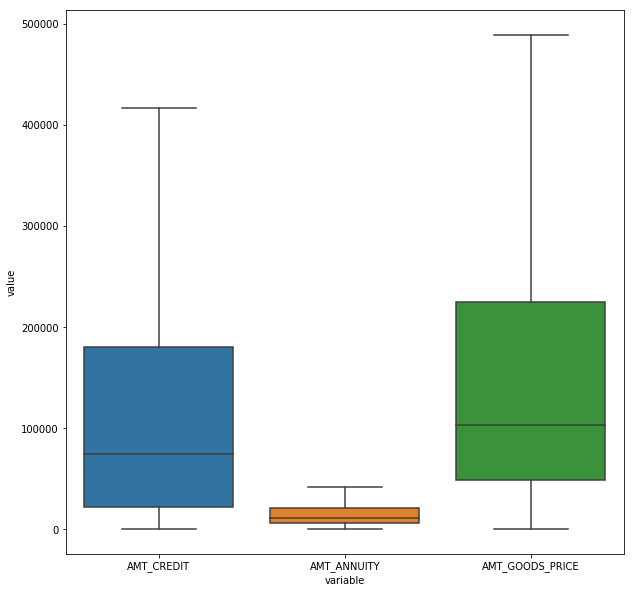

In [16]:
# removing all values above 1000000 from AMT_CREDIT column
previous_application.AMT_CREDIT = previous_application.AMT_CREDIT[previous_application.AMT_CREDIT<1000000]
# removing all values above 1000000 from AMT_GOODS_PRICE column
previous_application.AMT_GOODS_PRICE = previous_application.AMT_GOODS_PRICE[previous_application.AMT_GOODS_PRICE<1000000]

def standardizeAmount(x):
    if x> upperWhisker:
        return upperWhisker
    else:
        return x    
quantiles = previous_application.AMT_CREDIT.quantile([0.25,0.75])
IQR = quantiles.values[1] - quantiles.values[0]
upperWhisker = int( quantiles.values[1]+1.5*IQR )
previous_application.AMT_CREDIT = previous_application.AMT_CREDIT.apply(lambda x : standardizeAmount(x))

quantiles = previous_application.AMT_ANNUITY.quantile([0.25,0.75])
IQR = quantiles.values[1] - quantiles.values[0]
upperWhisker = int( quantiles.values[1]+1.5*IQR )
previous_application.AMT_ANNUITY = previous_application.AMT_ANNUITY.apply(lambda x : standardizeAmount(x))

quantiles = previous_application.AMT_GOODS_PRICE.quantile([0.25,0.75])
IQR = quantiles.values[1] - quantiles.values[0]
upperWhisker = int( quantiles.values[1]+1.5*IQR )
previous_application.AMT_GOODS_PRICE = previous_application.AMT_GOODS_PRICE.apply(lambda x : standardizeAmount(x))

amt = previous_application.loc[:,['AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE']]
plt.figure(figsize = (10,10))
sns.boxplot(x="variable", y="value", data=pd.melt(amt))

After removing the outliers, we are perfectly defined to have these amount values in normal scenarios.

Let us look at the data we have now.

In [17]:
previous_application.head()

,SK_ID_CURR,SK_ID_PREV,NAME_CONTRACT_STATUS,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NAME_PAYMENT_TYPE,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_PORTFOLIO,NAME_YIELD_GROUP,CHANNEL_TYPE,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
0,271877,2030495,Approved,Consumer loans,SATURDAY,15,Cash through the bank,NaN,Repeater,POS,middle,Country-wide,17145.0,1730.430,17145.0
1,108129,2802425,Approved,Cash loans,THURSDAY,11,XNA,Unaccompanied,Repeater,Cash,low_action,Contact center,416432.0,25188.615,489134.0
2,122040,2523466,Approved,Cash loans,TUESDAY,11,Cash through the bank,"Spouse, partner",Repeater,Cash,high,Credit and cash offices,136444.5,15060.735,112500.0
3,176158,2819243,Approved,Cash loans,MONDAY,7,Cash through the bank,NaN,Repeater,Cash,middle,Credit and cash offices,416432.0,42163.000,450000.0
4,202054,1784265,Refused,Cash loans,THURSDAY,9,Cash through the bank,NaN,Repeater,Cash,high,Credit and cash offices,404055.0,31924.395,337500.0


# 3. Data Categorization

Before we move forward with the Analysis, we will first Categorize the dataset into different categories.

This is done since it will be easier to find why a particular loan is either Approved or Refused and what factors cause the same.

We will now categorize the data into 4 categories based on the loan status of the previous clients which are mentioned below:
1. ***Approved*** - Bank approved the loan
2. ***Refused*** - Bank Refused the loan
3. ***Cancelled*** - Customer Cancelled the loan application
4. ***Unused Offer*** - Customer Cancelled the loan application during processing.

In [18]:
# Finding all the rows where the loan was approved and moving them to a new df
df_approved = previous_application[previous_application['NAME_CONTRACT_STATUS'] == 'Approved']
# Finding all the rows where the loan was cancelled and moving them to a new df
df_canceled = previous_application[previous_application['NAME_CONTRACT_STATUS'] == 'Canceled']
# Finding all the rows where the loan was Refused and moving them to a new df
df_refused = previous_application[previous_application['NAME_CONTRACT_STATUS'] == 'Refused']
# Finding all the rows where the loan was Unused and moving them to a new df
df_unused = previous_application[previous_application['NAME_CONTRACT_STATUS'] == 'Unused offer']

Now we will perform analysis on the loans which were <font color='green'>***Approved***</font> and <font color='red'>***Refused***</font> since these categories are ```dependent on the bank```.

The remaining 2 categories are ```Customer driven``` and since there might be ***many factors*** which drive the customers to <font color='red'>***Cancel***</font> the loan process, ***we will not be analysing them for now***.

Now the data looks good and we can start with the data anlysis.

We will be performing the below type of data analysis methods on the dataset:
    
    - Univariate Data analysis
    - Segmented Univariate Data analysis
    - Bivariate Data analysis

# 4. Univariate Data Analysis

Now we will be performing the Univariate analysis on 2 categories of column within the Approved and Refused dataset:
    1. Categorical
    2. Numerical

### 4.1 Finding Categorical Columns

In [19]:
# Finding the categorical columns and printing the same.
categorical = previous_application.select_dtypes(exclude=['int64','float64'])
categorical = categorical.iloc[:,3:]
categCols = categorical.columns
categCols

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'NAME_PAYMENT_TYPE',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO',
       'NAME_YIELD_GROUP', 'CHANNEL_TYPE'],
      dtype='object')

#### 4.1.1 Univariate analysis on the categorical Columns

Again here, we are running a ***for-loop*** and printing a ***bar graph*** seperately for both <font color='green'>***Approved***</font> and <font color='red'>***Refused***</font> type of loans for all ```Categorical Columns```.

<Figure size 432x288 with 0 Axes>

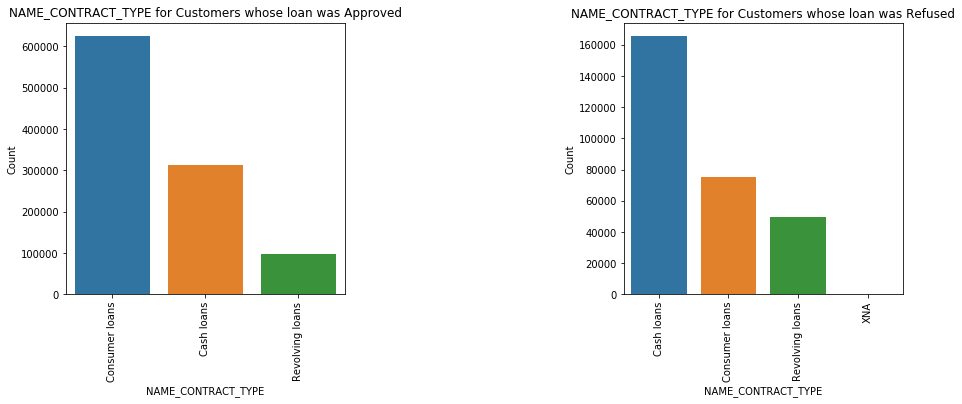

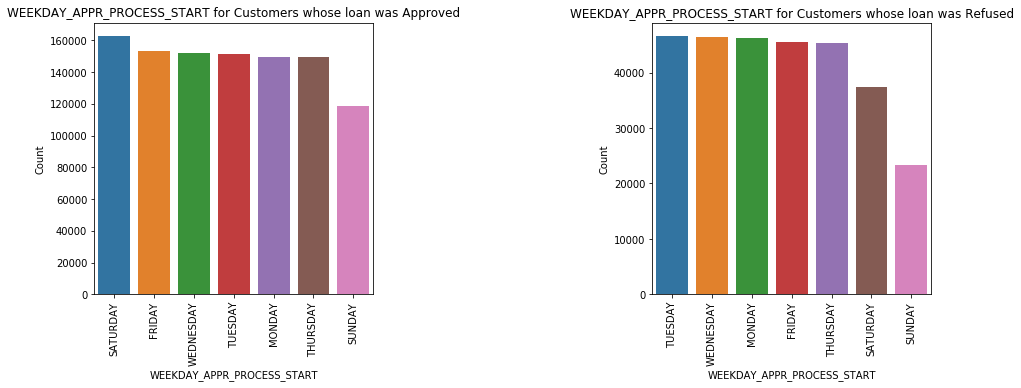

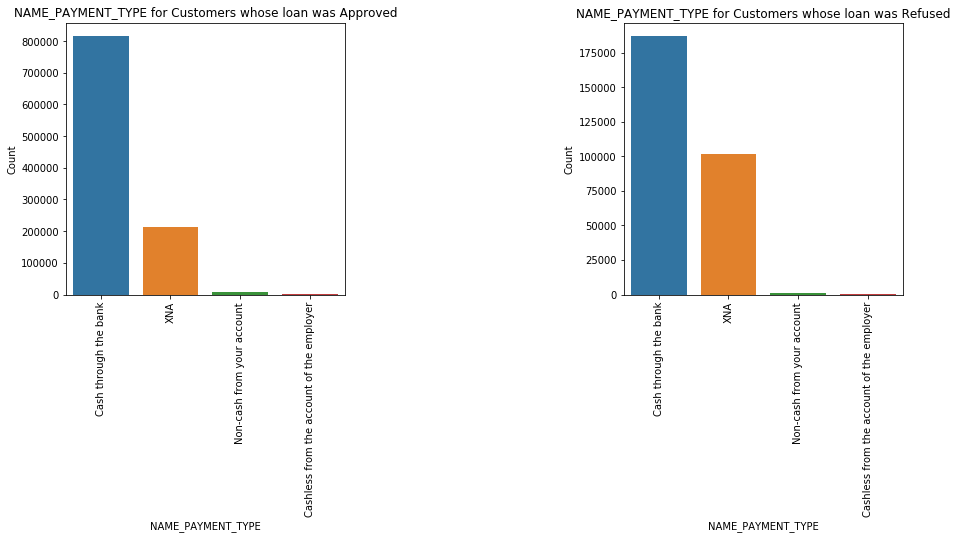

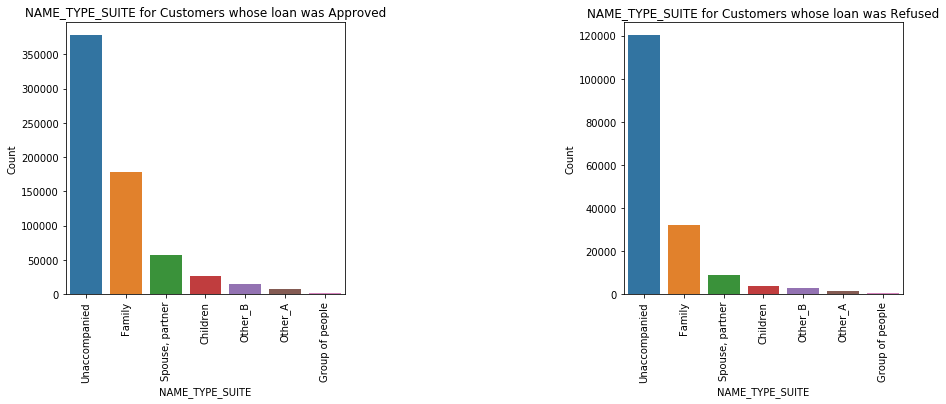

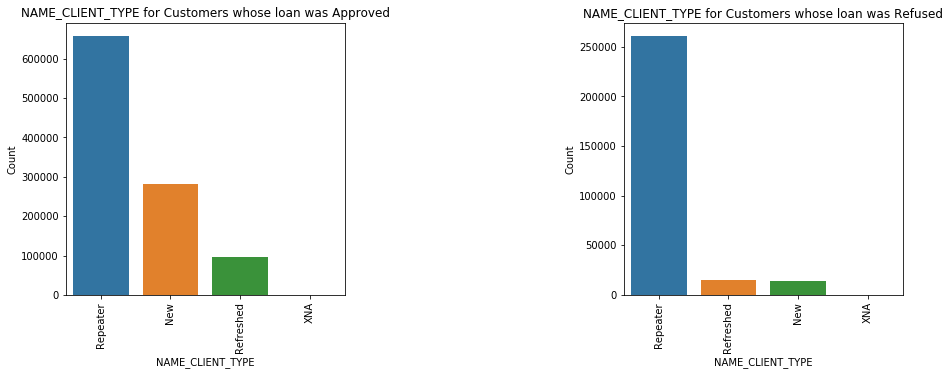

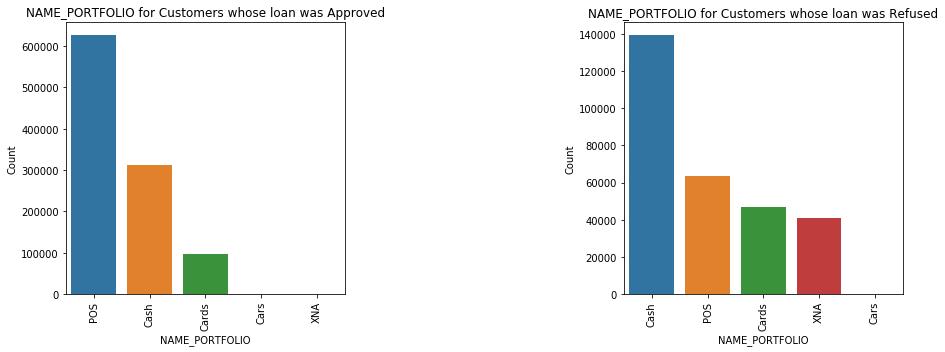

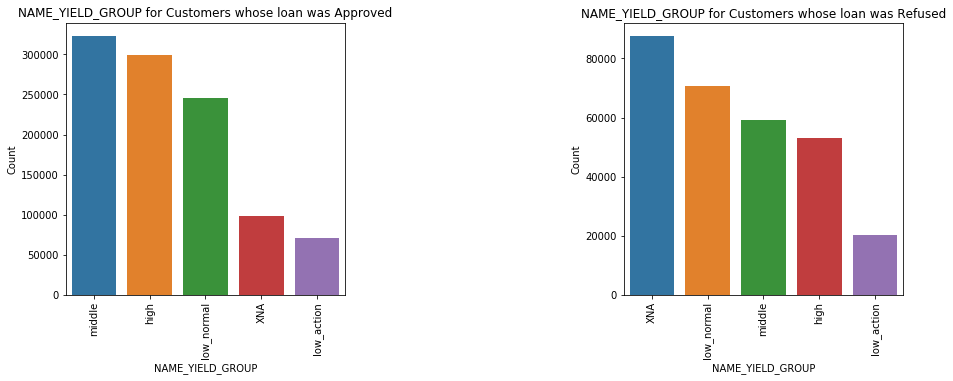

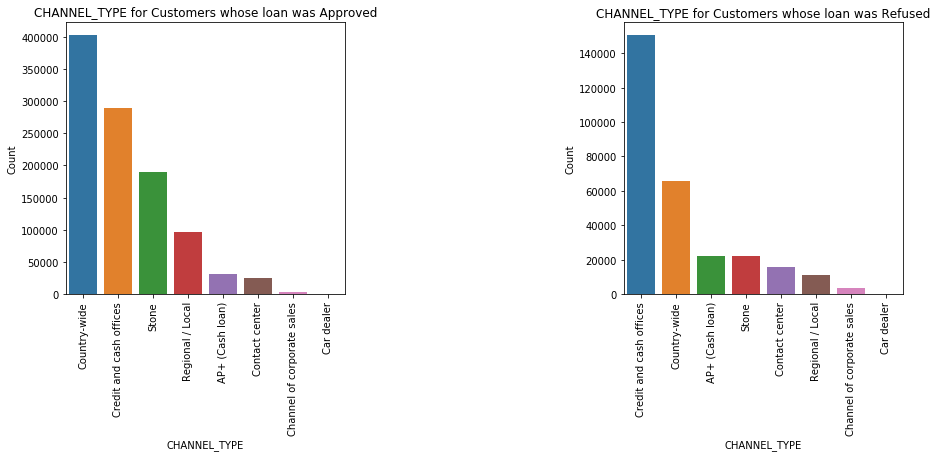

In [20]:
for i,col in enumerate(categCols):
    plt.figure(1)
    plt.figure(figsize=(15,5))
    for j,df in enumerate([df_approved,df_refused]):
        dfTemp = df[col].value_counts()
        dfTemp = dfTemp.to_frame()
        dfTemp.index.name=col
        dfTemp.rename(columns={col:'Count'},inplace=True)
        plt.subplots_adjust(wspace = 1)
        plt.subplot(1,2,j+1)
        plt.xticks(rotation=90)
        sns.barplot(x= dfTemp.index, y = dfTemp.Count)
        if j==0:
            plt.title(col + " for Customers whose loan was Approved")
        else:
            plt.title(col + " for Customers whose loan was Refused")

##### Findings

1. For Loans which were <font color='green'>**Approved**</font>, the ```"Consumer Loans"``` were more than others and for <font color='red'>**Refused**</font>, the ```"Cash Loans"``` were more.
2. For Loans which were <font color='green'>**Approved**</font>, the process was started on ```Saturday``` as opposed to loans which were <font color='red'>**Refused**</font> which was started on ```Tuesday```. It is interesting to note that the <font color='red'>**least**</font> amount of approvals is done for Sunday start.
3. In both outcomes of loan status, we can see that the users <font color='green'>**preferred**</font> to pay via the ```"Cash through the bank"``` option as opposed to other options provided to the customer.
4. Most of the clients who apply for loans are ```"Unaccompanied"```. And there is a drastic <font color='red'>***drop***</font> to the ones who are accompanied with their ```"Family"```, and so on with their spouse and children.
5. Also, majority of the customer who apply for a loan are ```"Repeat customers"``` and if the customer is a ```"New customer"```, then the probability of them having their <font color='green'>**Loan Approved**</font> is <font color='green'>**more**</font> than a <font color='red'>**Refusal**</font> of the loan.
6. For Loans which were <font color='green'>**Approved**</font>, we can see that the application was <font color='green'>***more***</font> for ```"POS"``` as opposed to ```"Cash"``` for loan <font color='red'>**Refusals**</font>. Hence we have to target users who go for ```"POS"``` option.
7. We can also see that if the ```"rate of interest is in the middle group"``` then the <font color='green'>**Loan Approval**</font> is <font color='green'>***more***</font> as opposed to <font color='red'>**Loan Refusals**</font> which is high for ```"low_normal interest"``` rates.
8. We can also see that we should prioritize the loan application for clients from ```"Country-wide search"``` since these clients have a higher rate of Loan Approvals. We should also avoid/ deprioritize the loan application for clients who are from ```Credit and cash offices``` since these clients have a higher rate of <font color='red'>**Loan Refusals**</font>.

### 4.2 Numerical Columns

Now we will find the numerical columns and perform the same analysis. We will also try to find a correlation between the numerical columns.

In [21]:
# Finding the numerical columns and printing the same.
numerical = previous_application.select_dtypes(include=['int64','float64'])
numCols = numerical.columns
numCols

Index(['HOUR_APPR_PROCESS_START', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE'],
      dtype='object')

#### 4.2.1 Finding Correlations for each loan category for numerical columns.

Plotting a ***Heat Map*** to find any correlation between the numerical columns.

<Figure size 432x288 with 0 Axes>

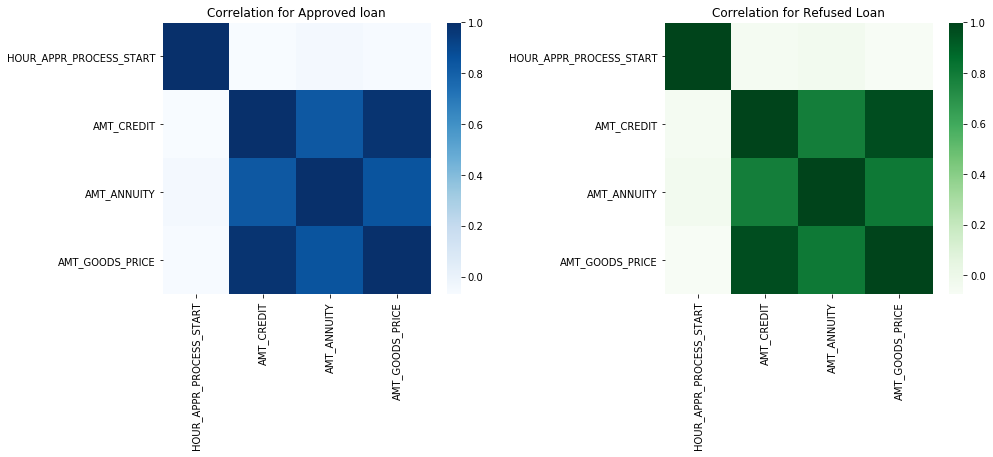

In [22]:
plt.figure(1)
plt.figure(figsize=(15,5))
plt.subplots_adjust(wspace = 0.5)
plt.subplot(1,2,1)
corr1 = df_approved.loc[:,numCols].corr()
sns.heatmap(corr1, cmap="Blues")
plt.title('Correlation for Approved loan')
plt.subplot(1,2,2)
corr0 = df_refused.loc[:,numCols].corr()
plt.title('Correlation for Refused Loan')
sns.heatmap(corr0, cmap="Greens")

##### Findings

Heatmaps are very much alike for both the Loan categories. Let us look at the numbers now for more understanding.

Getting the ```top``` correlations for <font color='green'>***Approved***</font> Loans:

In [23]:
c1 = corr1.unstack().sort_values(ascending = False).drop_duplicates()
c1

AMT_GOODS_PRICE  AMT_GOODS_PRICE            1.000000
                 AMT_CREDIT                 0.980108
                 AMT_ANNUITY                0.853348
AMT_ANNUITY      AMT_CREDIT                 0.834701
                 HOUR_APPR_PROCESS_START   -0.047684
AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START   -0.061539
AMT_CREDIT       HOUR_APPR_PROCESS_START   -0.069567
dtype: float64

Getting the ```top``` correlations for <font color='red'>***Refused***</font> Loans:

In [24]:
c0 = corr0.unstack().sort_values(ascending = False).drop_duplicates()
c0

AMT_GOODS_PRICE  AMT_GOODS_PRICE            1.000000
                 AMT_CREDIT                 0.966937
                 AMT_ANNUITY                0.808093
AMT_ANNUITY      AMT_CREDIT                 0.788750
                 HOUR_APPR_PROCESS_START   -0.033946
AMT_CREDIT       HOUR_APPR_PROCESS_START   -0.051047
AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START   -0.075401
dtype: float64

### 4.2.2 Inference:

***Inferences from Correlations:-***
1. We notice that the top correlations are between the same attributes for both the categories of Loan category. It is only that the correlation value is changed. The top correlations exist between these columns:-
    - ```AMT_GOODS_PRICE & AMT_CREDIT```
    - ```AMT_GOODS_PRICE & AMT_ANNUITY```    
    - ```AMT_ANNUITY & AMT_CREDIT```               
        
    
2. The other interesting thing to note is that the attributes are slightly tightly correlated in the case of loan being <font color='green'>***Approved***</font> in comparison to the loan being <font color='red'>***Refused***</font>. This can be said because the correlated values lie in the range **[0.980051 - 0.835130]** for <font color='green'>***Approved***</font> Loans; while it lies in the range **[0.967247 - 0.789313]** for <font color='red'>***Refused***</font> loans.

#### 4.2.2 Univariate Analysis for Numerical Columns

Again here, we are running a ***for-loop*** and printing a ***bar graph*** seperately for both <font color='green'>***Approved***</font> and <font color='red'>***Refused***</font> type of loans for all ```Numerical Columns```.

<Figure size 432x288 with 0 Axes>

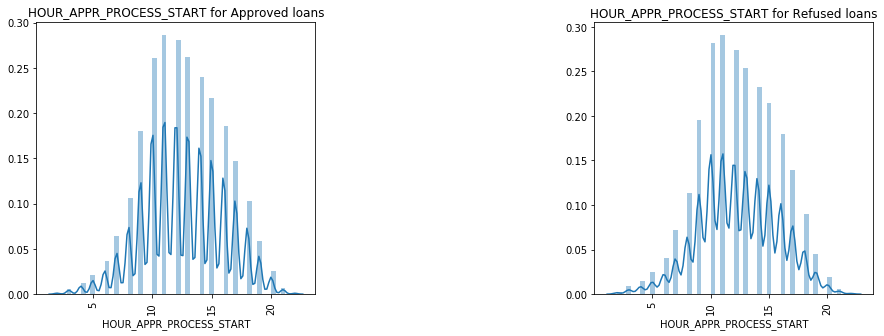

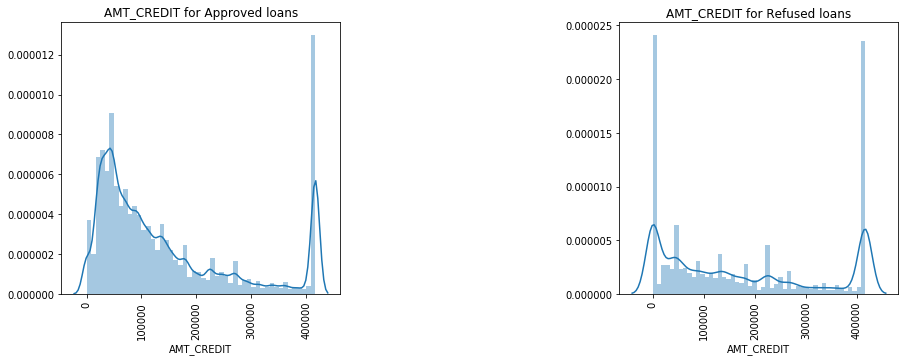

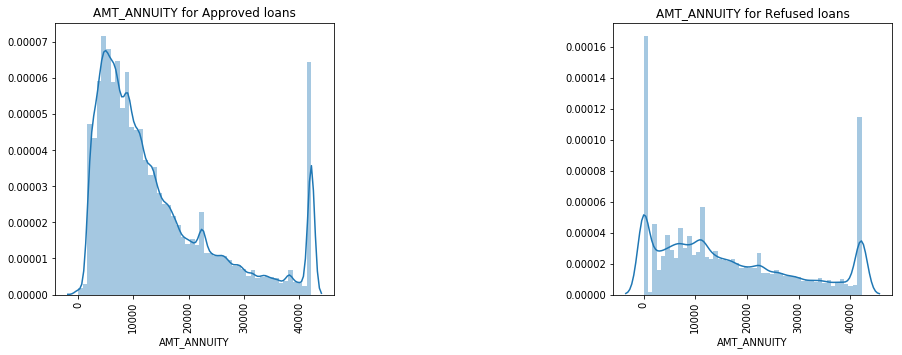

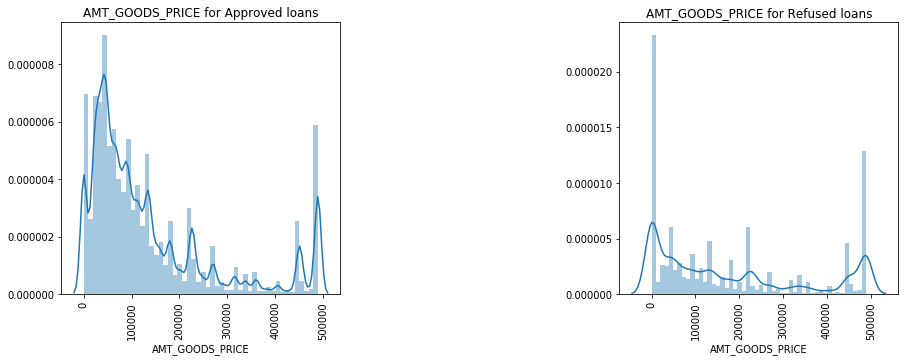

In [25]:
# Explicitly controlling the SettingWithCopy settings
pd.set_option('mode.chained_assignment', None)

for i,col in enumerate(numCols):
    plt.figure(1)
    plt.figure(figsize=(15,5))
    for j,df in enumerate([df_approved,df_refused]):
        plt.subplots_adjust(wspace = 1)
        plt.subplot(1,2,j+1)
        plt.xticks(rotation=90)
        df[col] = df[col].fillna(0).astype(int)
        sns.distplot(df[col])
        if j==0:
            plt.title(col + " for Approved loans")
        else:
            plt.title(col + " for Refused loans")


##### Findings:

1. ***Most*** applications have been filled for early office hours like ```10 AM and 11 AM```.
2. We can see clients who had <font color='green'>***Approved***</font> loans opt for loans amount between ```50,000 and 1,00,000```. For <font color='red'>***Refused***</font> loans, there is a spike at amount of ```10000```.  Also an interesting thing is that there is a ***sudden spike*** at ```4,00,000``` for both categories.
3. As seen in loan credit amount, there is a ***similar spike*** in ```annuity amount``` at ```40,000```.
4. Clients whose loan was <font color='green'>***Approved***</font> have <font color='green'>***more***</font> loans for goods amounting of ```50,000``` in comparison to ```3,00,000 and 4,00,000``` while those whose loan was <font color='red'>***Refused***</font> have goods amounting of either ```10,000 or 4,80,000```.

# 5. Segmented Univariate Analysis

Now we will look at performing some ```Segmented Univariate``` Analysis.

We will now check which factors would drive the Approval/ Refusal of the loan.

### 5.1. How is the credit amount affected by the loan type?

In [26]:
df1 = df_approved.groupby(df_approved.NAME_CONTRACT_TYPE)['AMT_GOODS_PRICE','AMT_CREDIT','AMT_ANNUITY'].mean()
print('Segmented Univariate on NAME_CONTRACT_TYPE for Approved Loans')
print(df1)
df0 = df_refused.groupby(df_refused.NAME_CONTRACT_TYPE)['AMT_GOODS_PRICE','AMT_CREDIT','AMT_ANNUITY'].mean()
print('Segmented Univariate on NAME_CONTRACT_TYPE for Refused loans')
print(df0)

Segmented Univariate on NAME_CONTRACT_TYPE for Approved Loans
                    AMT_GOODS_PRICE     AMT_CREDIT   AMT_ANNUITY
NAME_CONTRACT_TYPE                                              
Cash loans            242256.463253  234639.841547  22838.183173
Consumer loans         89867.132661   87592.766568   9870.078574
Revolving loans        94403.521249  192010.286731  11358.880824
Segmented Univariate on NAME_CONTRACT_TYPE for Refused loans
                    AMT_GOODS_PRICE     AMT_CREDIT   AMT_ANNUITY
NAME_CONTRACT_TYPE                                              
Cash loans            219036.269924  198996.875247  21079.449358
Consumer loans        106089.350083  102964.141411   9298.043785
Revolving loans       146531.010316  191546.963459  10549.387411
XNA                        0.000000       0.000000      0.000000


In [27]:
df = pd.concat([df1.AMT_CREDIT.to_frame(),df0.AMT_CREDIT.to_frame()], axis =1, sort=True)
df.columns = ['Approved-AMT_CREDIT','Refused-AMT_CREDIT']
df

,Approved-AMT_CREDIT,Refused-AMT_CREDIT
Cash loans,234639.841547,198996.875247
Consumer loans,87592.766568,102964.141411
Revolving loans,192010.286731,191546.963459
XNA,NaN,0.000000


Visualizing the above data to get a more clear picture

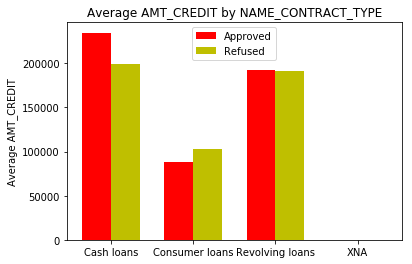

In [28]:
Approved_means = df['Approved-AMT_CREDIT']
ind = np.arange(4)
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(ind, Approved_means, width, color='r')
Refused_means = df['Refused-AMT_CREDIT']
rects2 = ax.bar(ind + width, Refused_means, width, color='y')
ax.set_ylabel('Average AMT_CREDIT')
ax.set_title('Average AMT_CREDIT by NAME_CONTRACT_TYPE')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(df.index)
ax.legend((rects1[0], rects2[0]), ('Approved', 'Refused'))
plt.show()

#### Findings:

- The Average Credit Amount for <font color='green'>***Approved***</font> Loans is <font color='green'>***more***</font> for ```Cash loans``` and <font color='red'>***least***</font> for ```Consumer loans``` but it is the opposite for <font color='red'>***Refused***</font> Loans.

- The Average Credit Amount for Revolving Loan type is ```same``` for both <font color='green'>***Approved***</font> and <font color='red'>***Refused***</font> loans.



### 5.2. How is the credit amount affected by the payment type?


In [29]:
df1 = df_approved.groupby(df_approved.NAME_PAYMENT_TYPE)['AMT_GOODS_PRICE','AMT_CREDIT','AMT_ANNUITY'].mean()
print('Segmented Univariate on NAME_PAYMENT_TYPE for Approved Loans')
print(df1)
df0 = df_refused.groupby(df_refused.NAME_PAYMENT_TYPE)['AMT_GOODS_PRICE','AMT_CREDIT','AMT_ANNUITY'].mean()
print('Segmented Univariate on NAME_PAYMENT_TYPE for Refused loans')
print(df0)

Segmented Univariate on NAME_PAYMENT_TYPE for Approved Loans
                                           AMT_GOODS_PRICE     AMT_CREDIT  \
NAME_PAYMENT_TYPE                                                           
Cash through the bank                        142176.894633  138264.104087   
Cashless from the account of the employer    111007.912993  108202.974478   
Non-cash from your account                   107276.780196  103991.858317   
XNA                                          114352.157776  156656.847144   

                                            AMT_ANNUITY  
NAME_PAYMENT_TYPE                                        
Cash through the bank                      14333.498960  
Cashless from the account of the employer  12155.613689  
Non-cash from your account                 11062.010522  
XNA                                        12424.206863  
Segmented Univariate on NAME_PAYMENT_TYPE for Refused loans
                                           AMT_GOODS_PRICE     AMT_C

In [30]:
df = pd.concat([df1.AMT_CREDIT.to_frame(),df0.AMT_CREDIT.to_frame()], axis =1, sort=True)
df.columns = ['Approved-AMT_CREDIT','Refused-AMT_CREDIT']
df

,Approved-AMT_CREDIT,Refused-AMT_CREDIT
NAME_PAYMENT_TYPE,,
Cash through the bank,138264.104087,188291.535629
Cashless from the account of the employer,108202.974478,200781.933333
Non-cash from your account,103991.858317,163395.626790
XNA,156656.847144,144595.731167


Visualizing the above data to get a more clear picture

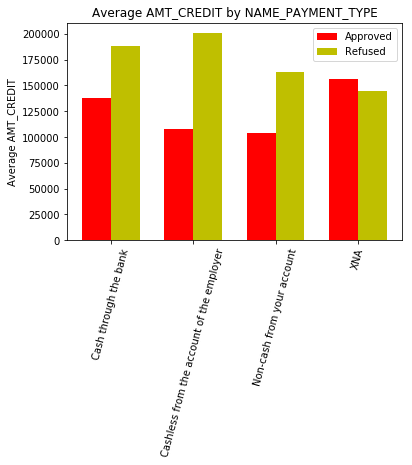

In [31]:
Approved_means = df['Approved-AMT_CREDIT']
ind = np.arange(4)
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(ind, Approved_means, width, color='r')
Refused_means = df['Refused-AMT_CREDIT']
rects2 = ax.bar(ind + width, Refused_means, width, color='y')
ax.set_ylabel('Average AMT_CREDIT')
ax.set_title('Average AMT_CREDIT by NAME_PAYMENT_TYPE')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(df.index)
ax.legend((rects1[0], rects2[0]), ('Approved', 'Refused'))
plt.xticks(rotation=75)
plt.show()

### Findings:

- The average credit amount for any kind of payment type have been **higher** for <font color='red'>**Refused**</font> Loans than <font color='green'>**Approved**</font> loans.

- The average of the credit amount is more for ```"Cash through the bank"``` payment type as opposed to ```"Non-Cash from your account"``` payment type for <font color='green'>**Approved**</font> Loans.

- The average of the credit amount is more for ```"Cashless from the account of the employer"``` payment type as opposed to ```"Non-Cash from your account"``` payment type for <font color='red'>**Refused**</font> Loans.

### 5.3. How is the credit amount affected by the client companian?


In [32]:
df1 = df_approved.groupby(df_approved.NAME_TYPE_SUITE)['AMT_GOODS_PRICE','AMT_CREDIT','AMT_ANNUITY'].mean()
print('Segmented Univariate on NAME_TYPE_SUITE for Approved Loans')
print(df1)
df0 = df_refused.groupby(df_refused.NAME_TYPE_SUITE)['AMT_GOODS_PRICE','AMT_CREDIT','AMT_ANNUITY'].mean()
print('Segmented Univariate on NAME_TYPE_SUITE for Refused loans')
print(df0)

Segmented Univariate on NAME_TYPE_SUITE for Approved Loans
                 AMT_GOODS_PRICE     AMT_CREDIT   AMT_ANNUITY
NAME_TYPE_SUITE                                              
Children            98440.013775   96079.893534  10144.608442
Family             119755.806919  116096.789761  11978.481687
Group of people    107813.580290  104119.728116  11167.107246
Other_A            101075.352910   98523.486111  10878.853968
Other_B            103900.073357  102325.739910  11052.398282
Spouse, partner    126940.583451  122819.566903  12866.949655
Unaccompanied      163570.263280  158286.402454  15298.228968
Segmented Univariate on NAME_TYPE_SUITE for Refused loans
                 AMT_GOODS_PRICE     AMT_CREDIT   AMT_ANNUITY
NAME_TYPE_SUITE                                              
Children           144807.649764  135718.695004  12515.978126
Family             180367.590936  164948.491869  16398.822622
Group of people    161066.521277  146466.987234  15009.027660
Other_A        

In [33]:
df = pd.concat([df1.AMT_CREDIT.to_frame(),df0.AMT_CREDIT.to_frame()], axis =1, sort=True)
df.columns = ['Approved-AMT_CREDIT','Refused-AMT_CREDIT']
df

,Approved-AMT_CREDIT,Refused-AMT_CREDIT
NAME_TYPE_SUITE,,
Children,96079.893534,135718.695004
Family,116096.789761,164948.491869
Group of people,104119.728116,146466.987234
Other_A,98523.486111,127917.663302
Other_B,102325.739910,135955.235622
"Spouse, partner",122819.566903,163082.776294
Unaccompanied,158286.402454,207034.934236


Visualizing the above data to get a more clear picture

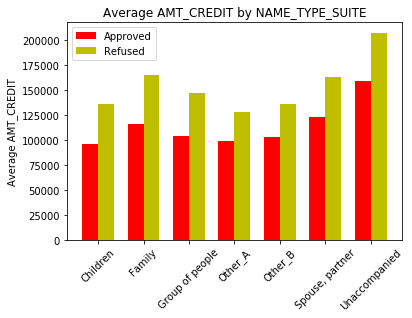

In [34]:
Target1_means = df['Approved-AMT_CREDIT']
ind = np.arange(7)
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(ind, Target1_means, width, color='r')
Target0_means = df['Refused-AMT_CREDIT']
rects2 = ax.bar(ind + width, Target0_means, width, color='y')
ax.set_ylabel('Average AMT_CREDIT')
ax.set_title('Average AMT_CREDIT by NAME_TYPE_SUITE')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(df.index)
ax.legend((rects1[0], rects2[0]), ('Approved', 'Refused'))
plt.xticks(rotation=45)
plt.show()

### Findings:

- The average credit amount for any client accomplice have been a higher for <font color='red'>**Refused**</font> Loans than <font color='green'>**Approved**</font> loans.
- The average credit limit is more for clients who came ```Unaccompanied``` to the bank as opposed to ```Children or a Family or with a Group of people``` for <font color='green'>**Approved**</font> loans.
- The average credit limit is more for clients who came ```Unaccompanied``` to the bank as opposed to ```Other_A or Other_B``` category for <font color='red'>**Refused**</font> loans.

### 5.4. How is the credit amount affected by the client type?


In [35]:
df1 = df_approved.groupby(df_approved.NAME_CLIENT_TYPE)['AMT_GOODS_PRICE','AMT_CREDIT','AMT_ANNUITY'].mean()
print('Segmented Univariate on NAME_CLIENT_TYPE for Approved Loans')
print(df1)
df0 = df_refused.groupby(df_refused.NAME_CLIENT_TYPE)['AMT_GOODS_PRICE','AMT_CREDIT','AMT_ANNUITY'].mean()
print('Segmented Univariate on NAME_CLIENT_TYPE for Refused loans')
print(df0)

Segmented Univariate on NAME_CLIENT_TYPE for Approved Loans
                  AMT_GOODS_PRICE     AMT_CREDIT   AMT_ANNUITY
NAME_CLIENT_TYPE                                              
New                  96312.687672   94064.717154  10283.855887
Refreshed           142376.832152  149058.929001  14445.952461
Repeater            152377.878403  161084.540646  15396.146456
XNA                 154585.873702  143504.235294  14414.280277
Segmented Univariate on NAME_CLIENT_TYPE for Refused loans
                  AMT_GOODS_PRICE     AMT_CREDIT   AMT_ANNUITY
NAME_CLIENT_TYPE                                              
New                 125297.345506  124432.461160  11452.226803
Refreshed           175968.625291  176549.375906  15293.081753
Repeater            180343.724266  175296.687779  16553.003140
XNA                 228471.180791  200435.556497  17269.121469


In [36]:
df = pd.concat([df1.AMT_CREDIT.to_frame(),df0.AMT_CREDIT.to_frame()], axis =1, sort=True)
df.columns = ['Approved-AMT_CREDIT','Refused-AMT_CREDIT']
df

,Approved-AMT_CREDIT,Refused-AMT_CREDIT
NAME_CLIENT_TYPE,,
New,94064.717154,124432.461160
Refreshed,149058.929001,176549.375906
Repeater,161084.540646,175296.687779
XNA,143504.235294,200435.556497


Visualizing the above data to get a more clear picture

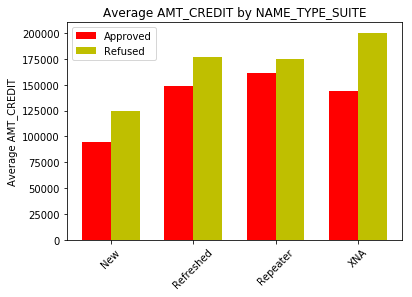

In [37]:
Target1_means = df['Approved-AMT_CREDIT']
ind = np.arange(4)
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(ind, Target1_means, width, color='r')
Target0_means = df['Refused-AMT_CREDIT']
rects2 = ax.bar(ind + width, Target0_means, width, color='y')
ax.set_ylabel('Average AMT_CREDIT')
ax.set_title('Average AMT_CREDIT by NAME_TYPE_SUITE')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(df.index)
ax.legend((rects1[0], rects2[0]), ('Approved', 'Refused'))
plt.xticks(rotation=45)
plt.show()

### Findings:

- The average credit amount for any type of client```(New/Repeater/Refreshed)``` has been higher for <font color='red'>**Refused**</font> Loans than <font color='green'>**Approved**</font> loans.

- The average credit amount is more for ```Repeater Clients``` as opposed to ```New Clients``` for <font color='green'>**Approved**</font> loans.

- The average credit amount is more for ```Refreshed Clients``` as opposed to ```New Clients``` for <font color='red'>**Refused**</font> loans.

### 5.5. How is the credit amount affected by the loan portfolio?


In [38]:
df1 = df_approved.groupby(df_approved.NAME_PORTFOLIO)['AMT_GOODS_PRICE','AMT_CREDIT','AMT_ANNUITY'].mean()
print('Segmented Univariate on NAME_PORTFOLIO for Approved Loans')
print(df1)
df0 = df_refused.groupby(df_refused.NAME_PORTFOLIO)['AMT_GOODS_PRICE','AMT_CREDIT','AMT_ANNUITY'].mean()
print('Segmented Univariate on NAME_PORTFOLIO for Refused loans')
print(df0)

Segmented Univariate on NAME_PORTFOLIO for Approved Loans
                AMT_GOODS_PRICE     AMT_CREDIT   AMT_ANNUITY
NAME_PORTFOLIO                                              
Cards              94403.521249  192010.286731  11358.880824
Cars               66953.703422  210864.076046  31041.296578
Cash              242255.766987  234639.280419  22838.475468
POS                89876.756047   87540.993984   9861.186897
XNA               296658.500000  278483.000000      0.000000
Segmented Univariate on NAME_PORTFOLIO for Refused loans
                AMT_GOODS_PRICE     AMT_CREDIT   AMT_ANNUITY
NAME_PORTFOLIO                                              
Cards             155289.256617  202997.171270  11180.242538
Cars               74613.661017  158808.813559  33686.830508
Cash              260196.590199  236351.730137  25126.223909
POS               112395.040191  108596.955022  10908.637414
XNA                22734.136171   22521.733428      0.000000


In [39]:
df = pd.concat([df1.AMT_CREDIT.to_frame(),df0.AMT_CREDIT.to_frame()], axis =1, sort=True)
df.columns = ['Approved-AMT_CREDIT','Refused-AMT_CREDIT']
df

,Approved-AMT_CREDIT,Refused-AMT_CREDIT
NAME_PORTFOLIO,,
Cards,192010.286731,202997.171270
Cars,210864.076046,158808.813559
Cash,234639.280419,236351.730137
POS,87540.993984,108596.955022
XNA,278483.000000,22521.733428


Visualizing the above data to get a more clear picture

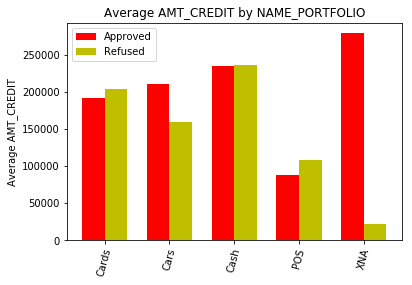

In [40]:
Target1_means = df['Approved-AMT_CREDIT']
ind = np.arange(5)
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(ind, Target1_means, width, color='r')
Target0_means = df['Refused-AMT_CREDIT']
rects2 = ax.bar(ind + width, Target0_means, width, color='y')
ax.set_ylabel('Average AMT_CREDIT')
ax.set_title('Average AMT_CREDIT by NAME_PORTFOLIO')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(df.index)
ax.legend((rects1[0], rects2[0]), ('Approved', 'Refused'))
plt.xticks(rotation=75)
plt.show()

### Findings:

- The average credit amount for ```any type of portfolio``` has been slightly higher for <font color='green'>**Approved**</font> Loans than <font color='red'>**Refused**</font> loans.
- The average credit amount has been <font color='green'>**more**</font> for clients who were looking to buy a ```Car``` as opposed to ```POS or card payment``` for <font color='green'>**Approved**</font> loans.
- The average credit amount has been <font color='green'>**more**</font> for clients who took a ```Cash``` loan as opposed to ```Car loan or POS``` for <font color='red'>**Refused**</font> loans.

### 5.6. How is the hour of process start affected by the day on which the process started?


In [41]:
df1 = df_approved.groupby(df_approved.WEEKDAY_APPR_PROCESS_START)['HOUR_APPR_PROCESS_START'].mean()
print('Segmented Univariate on WEEKDAY_APPR_PROCESS_START for Approved loans')
print(df1)
df0 = df_refused.groupby(df_refused.WEEKDAY_APPR_PROCESS_START)['HOUR_APPR_PROCESS_START'].mean()
print('Segmented Univariate on WEEKDAY_APPR_PROCESS_START for Refused loans')
print(df0)

Segmented Univariate on WEEKDAY_APPR_PROCESS_START for Approved loans
WEEKDAY_APPR_PROCESS_START
FRIDAY       12.656587
MONDAY       12.672402
SATURDAY     12.388925
SUNDAY       12.661060
THURSDAY     12.669750
TUESDAY      12.661486
WEDNESDAY    12.649030
Name: HOUR_APPR_PROCESS_START, dtype: float64
Segmented Univariate on WEEKDAY_APPR_PROCESS_START for Refused loans
WEEKDAY_APPR_PROCESS_START
FRIDAY       12.396975
MONDAY       12.429546
SATURDAY     12.087103
SUNDAY       12.373672
THURSDAY     12.474561
TUESDAY      12.447454
WEDNESDAY    12.415243
Name: HOUR_APPR_PROCESS_START, dtype: float64


In [42]:
df = pd.concat([df1.to_frame(),df0.to_frame()], axis =1, sort=True)
df.columns = ['Approved-HOUR_APPR_PROCESS_START','Refused-HOUR_APPR_PROCESS_START']
df

,Approved-HOUR_APPR_PROCESS_START,Refused-HOUR_APPR_PROCESS_START
WEEKDAY_APPR_PROCESS_START,,
FRIDAY,12.656587,12.396975
MONDAY,12.672402,12.429546
SATURDAY,12.388925,12.087103
SUNDAY,12.661060,12.373672
THURSDAY,12.669750,12.474561
TUESDAY,12.661486,12.447454
WEDNESDAY,12.649030,12.415243


Visualizing the above data to get a more clear picture

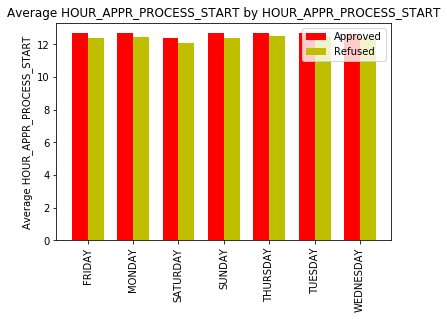

In [43]:
Approved_means = df['Approved-HOUR_APPR_PROCESS_START']
ind = np.arange(7)
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(ind, Approved_means, width, color='r')
Refused_means = df['Refused-HOUR_APPR_PROCESS_START']
rects2 = ax.bar(ind + width, Refused_means, width, color='y')
ax.set_ylabel('Average HOUR_APPR_PROCESS_START')
ax.set_title('Average HOUR_APPR_PROCESS_START by HOUR_APPR_PROCESS_START')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(df.index)
ax.legend((rects1[0], rects2[0]), ('Approved', 'Refused'))
plt.xticks(rotation=90)
plt.show()

### Findings:

Loan application starting process is generally seen at 12 PM in the afternoon, let it be any day. To be precise, the clients whose loan is <font color='green'>**Approved**</font> come slightly later on any day for loan applying than clients whose loan is <font color='red'>**Refused**</font>.

### 5.7. How is the credit amount affected by the Channel type?


In [44]:
df1 = df_approved.groupby(df_approved.CHANNEL_TYPE)['AMT_GOODS_PRICE','AMT_CREDIT','AMT_ANNUITY'].mean()
print('Segmented Univariate on CHANNEL_TYPE for Approved Loans')
print(df1)
df0 = df_refused.groupby(df_refused.CHANNEL_TYPE)['AMT_GOODS_PRICE','AMT_CREDIT','AMT_ANNUITY'].mean()
print('Segmented Univariate on CHANNEL_TYPE for Refused loans')
print(df0)

Segmented Univariate on CHANNEL_TYPE for Approved Loans
                            AMT_GOODS_PRICE     AMT_CREDIT   AMT_ANNUITY
CHANNEL_TYPE                                                            
AP+ (Cash loan)               192250.710960  218128.643079  18098.966284
Car dealer                     83394.146853  214899.199301  30547.944056
Channel of corporate sales    226753.429974  212892.306531  18764.744809
Contact center                175350.293378  225096.700476  19250.916733
Country-wide                   83967.171192   86175.186803   9187.212852
Credit and cash offices       231267.663754  242894.053644  22326.547406
Regional / Local              103624.207681  103342.144228  11014.826462
Stone                         103267.303011  100365.976192  11136.979723
Segmented Univariate on CHANNEL_TYPE for Refused loans
                            AMT_GOODS_PRICE     AMT_CREDIT   AMT_ANNUITY
CHANNEL_TYPE                                                            
AP+ (Cash loa

In [45]:
df = pd.concat([df1.AMT_CREDIT.to_frame(),df0.AMT_CREDIT.to_frame()], axis =1, sort=True)
df.columns = ['Approved-AMT_CREDIT','Refused-AMT_CREDIT']
df

,Approved-AMT_CREDIT,Refused-AMT_CREDIT
CHANNEL_TYPE,,
AP+ (Cash loan),218128.643079,206973.279334
Car dealer,214899.199301,162272.983607
Channel of corporate sales,212892.306531,213227.320059
Contact center,225096.700476,194818.249454
Country-wide,86175.186803,109865.557662
Credit and cash offices,242894.053644,201782.239774
Regional / Local,103342.144228,124571.279534
Stone,100365.976192,132383.030744


Visualizing the above data to get a more clear picture

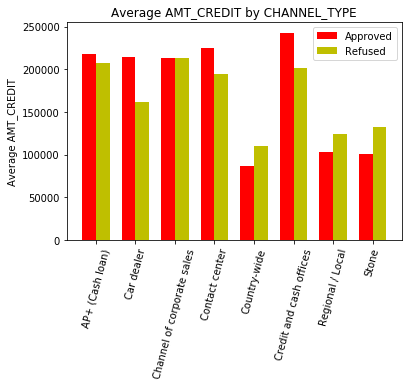

In [46]:
Target1_means = df['Approved-AMT_CREDIT']
ind = np.arange(8)
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(ind, Target1_means, width, color='r')
Target0_means = df['Refused-AMT_CREDIT']
rects2 = ax.bar(ind + width, Target0_means, width, color='y')
ax.set_ylabel('Average AMT_CREDIT')
ax.set_title('Average AMT_CREDIT by CHANNEL_TYPE')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(df.index)
ax.legend((rects1[0], rects2[0]), ('Approved', 'Refused'))
plt.xticks(rotation=75)
plt.show()

### Findings:
- The average credit amount has been <font color='green'>**more**</font> for <font color='green'>**Approved**</font> loans as compared with <font color='red'>**Refused**</font> loans.

- The average credit amount is <font color='green'>**more**</font> for ``Credit and Cash Offices`` and <font color='red'>**least**</font> for ``Country-wide channel`` for <font color='green'>**Approved**</font> loans.

- The average credit amount has been <font color='green'>**more**</font> for ```Channel of corporate sales``` as opposed to ``Country-wide channel`` for <font color='red'>**Refused**</font> loans.

### 5.8. How is the credit amount affected by the interest rate?


In [47]:
df1 = df_approved.groupby(df_approved.NAME_YIELD_GROUP)['AMT_GOODS_PRICE','AMT_CREDIT','AMT_ANNUITY'].mean()
print('Segmented Univariate on NAME_YIELD_GROUP for Approved Loans')
print(df1)
df0 = df_refused.groupby(df_refused.NAME_YIELD_GROUP)['AMT_GOODS_PRICE','AMT_CREDIT','AMT_ANNUITY'].mean()
print('Segmented Univariate on NAME_YIELD_GROUP for Refused loans')
print(df0)

Segmented Univariate on NAME_YIELD_GROUP for Approved Loans
                  AMT_GOODS_PRICE     AMT_CREDIT   AMT_ANNUITY
NAME_YIELD_GROUP                                              
XNA                  94411.795551  192013.824352  11358.416129
high                 92210.264372   94197.520551  10833.397591
low_action          131669.869533  134377.855903  12563.484663
low_normal          172493.554028  161097.878135  16671.511537
middle              163020.297066  157487.778582  15753.242982
Segmented Univariate on NAME_YIELD_GROUP for Refused loans
                  AMT_GOODS_PRICE     AMT_CREDIT   AMT_ANNUITY
NAME_YIELD_GROUP                                              
XNA                  93429.897896  118774.888402   5962.770505
high                149015.532652  157976.175291  15392.633867
low_action          142768.147347  127567.130618  24249.917343
low_normal          254393.386217  212763.281650  24121.124755
middle              247694.603248  234404.989874  20078.789339

In [48]:
df = pd.concat([df1.AMT_CREDIT.to_frame(),df0.AMT_CREDIT.to_frame()], axis =1, sort=True)
df.columns = ['Approved-AMT_CREDIT','Refused-AMT_CREDIT']
df

,Approved-AMT_CREDIT,Refused-AMT_CREDIT
NAME_YIELD_GROUP,,
XNA,192013.824352,118774.888402
high,94197.520551,157976.175291
low_action,134377.855903,127567.130618
low_normal,161097.878135,212763.281650
middle,157487.778582,234404.989874


Visualizing the above data to get a more clear picture

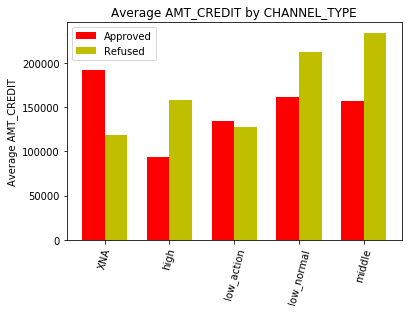

In [49]:
Target1_means = df['Approved-AMT_CREDIT']
ind = np.arange(5)
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(ind, Target1_means, width, color='r')
Target0_means = df['Refused-AMT_CREDIT']
rects2 = ax.bar(ind + width, Target0_means, width, color='y')
ax.set_ylabel('Average AMT_CREDIT')
ax.set_title('Average AMT_CREDIT by CHANNEL_TYPE')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(df.index)
ax.legend((rects1[0], rects2[0]), ('Approved', 'Refused'))
plt.xticks(rotation=75)
plt.show()

### Findings:


- The average credit amount has been more for <font color='red'>**Refused**</font> loans as comared with <font color='green'>**Approved**</font> loans for different interest rates.

- The average credit amount is more for ``low_normal`` interest group and least for ``high`` interest group for <font color='green'>**Approved**</font> loans.

- The average credit amount has been more for ```middle``` interest group as opposed to ``low_action`` interest group for <font color='red'>**Refused**</font> loans.


## 6. Bivariate Analysis

We will now perform ```Bivariate``` Analysis.

This will be done by taking the ```"NAME_CONTRACT_STATUS"``` column as the center since this column tells us that if the loan was <font color='green'>**Approved**</font>/<font color='red'>**Cancelled**</font>/<font color='red'>**Refused**</font> or <font color='red'>**Unused**</font> for the customer.

### 6.1 Processing the loan on which day and time has an impact on the loan status?

                                                    Approved Loans  \
HOUR_APPR_PROCESS_START WEEKDAY_APPR_PROCESS_START                   
2                       FRIDAY                                 102   
                        MONDAY                                  78   
                        SATURDAY                                74   
                        SUNDAY                                  39   
                        THURSDAY                               105   
                        TUESDAY                                104   
                        WEDNESDAY                               90   
3                       FRIDAY                                 347   
                        MONDAY                                 360   
                        SATURDAY                               384   
                        SUNDAY                                 177   
                        THURSDAY                               369   
                    

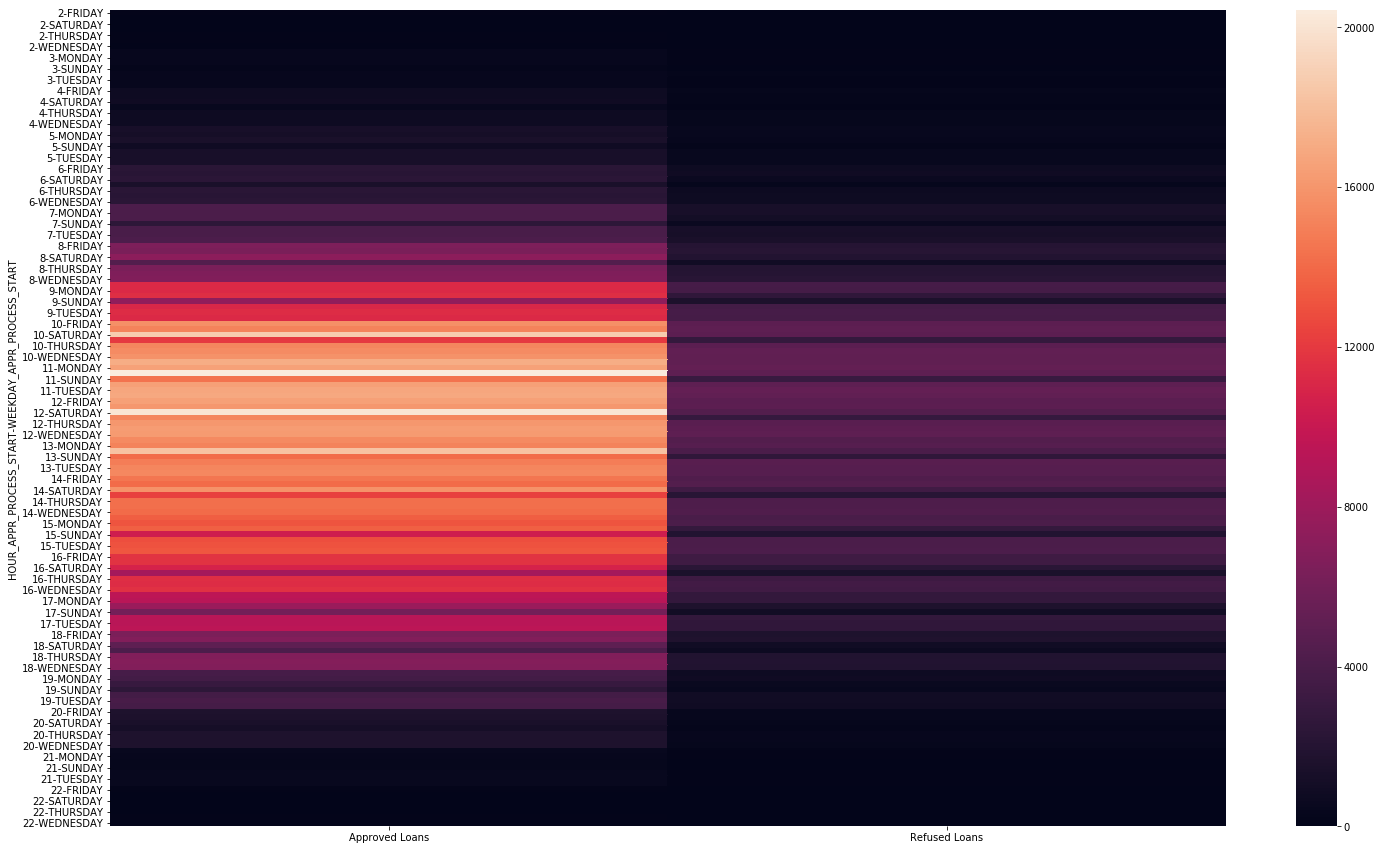

In [50]:
df1 = df_approved.groupby(['HOUR_APPR_PROCESS_START','WEEKDAY_APPR_PROCESS_START'])['NAME_CONTRACT_STATUS'].count()
df0 = df_refused.groupby(['HOUR_APPR_PROCESS_START','WEEKDAY_APPR_PROCESS_START'])['NAME_CONTRACT_STATUS'].count()
plt.figure(figsize = (25,15))
df = pd.concat([df1.to_frame(),df0.to_frame()], axis =1, sort=True)
df.columns = ['Approved Loans','Refused Loans']
print(df)
sns.heatmap(df)

### Findings:

- Hence we can see that the most amount of <font color='green'>**Approvals**</font> are done when the application is started on ``Saturday from 10 am to 1 PM`` or if it is better to start the application for the clients ``between 9 AM till 4 PM`` on any given day.

- Hence we can see that the most amount of <font color='red'>**Refusals**</font> are done when the application is started either ``before 8 AM or after 6 PM`` on any given day.

### 6.2 Now checking if the portfolio and the type suite have any impact on the loan status?

                                Approved Loans  Refused Loans
NAME_PORTFOLIO NAME_TYPE_SUITE                               
Cards          Children                  555.0            191
               Family                   6794.0           2868
               Group of people            44.0             23
               Other_A                   176.0             65
               Other_B                   361.0            142
               Spouse, partner          1650.0            676
               Unaccompanied           27950.0          14051
Cash           Children                 3926.0           1292
               Family                  26844.0          13281
               Group of people           239.0            168
               Other_A                   936.0            362
               Other_B                  2100.0            805
               Spouse, partner         10870.0           3750
               Unaccompanied          167939.0          82784
POS     

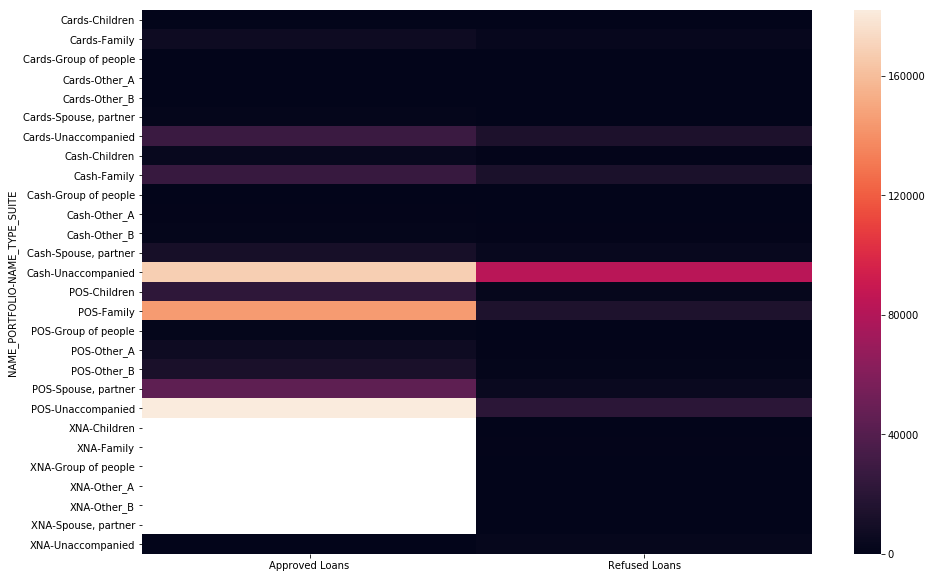

In [51]:
df1 = df_approved.groupby(['NAME_PORTFOLIO','NAME_TYPE_SUITE'])['NAME_CONTRACT_STATUS'].count()
df0 = df_refused.groupby(['NAME_PORTFOLIO','NAME_TYPE_SUITE'])['NAME_CONTRACT_STATUS'].count()
plt.figure(figsize = (15,10))
df = pd.concat([df1.to_frame(),df0.to_frame()], axis =1, sort=True)
df.columns = ['Approved Loans','Refused Loans']
print(df)
sns.heatmap(df)

### Findings:

- As we can see, if the client is asking for ```Cash loan and who had come Unaccompanied``` to the bank or if a client asks for a ```POS loan who came in with a Family``` stands a better chance for loan <font color='green'>**Approval**</font>.
- For card loan, both the <font color='green'>**Approval**</font> and <font color='red'>**Refusal**</font> count is low.

### 6.3 Now checking if the type of loan and the client type suite have any impact on the loan status?

                                     Approved Loans  Refused Loans
NAME_CLIENT_TYPE NAME_CONTRACT_TYPE                               
New              Cash loans                 16643.0           2361
                 Consumer loans            257351.0           9505
                 Revolving loans             7265.0           2564
                 XNA                            NaN              1
Refreshed        Cash loans                 30468.0           6818
                 Consumer loans             57460.0           4141
                 Revolving loans             9172.0           4073
                 XNA                            NaN              1
Repeater         Cash loans                265302.0         156526
                 Consumer loans            311239.0          61485
                 Revolving loans            81303.0          42820
                 XNA                            NaN             29
XNA              Cash loans                   127.0           

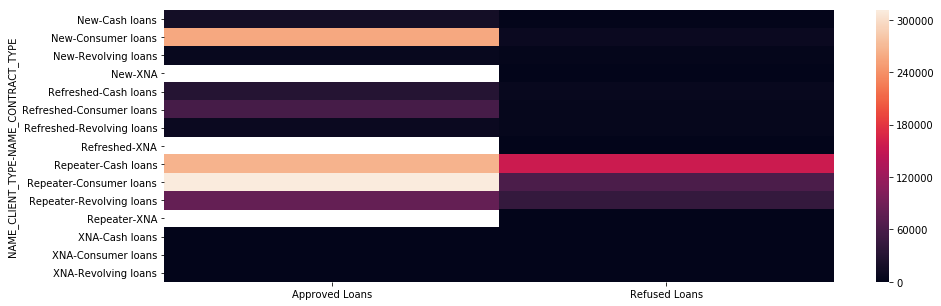

In [52]:
df1 = df_approved.groupby(['NAME_CLIENT_TYPE','NAME_CONTRACT_TYPE'])['NAME_CONTRACT_STATUS'].count()
df0 = df_refused.groupby(['NAME_CLIENT_TYPE','NAME_CONTRACT_TYPE'])['NAME_CONTRACT_STATUS'].count()
plt.figure(figsize = (15,5))
df = pd.concat([df1.to_frame(),df0.to_frame()], axis =1, sort=True)
df.columns = ['Approved Loans','Refused Loans']
print(df)
sns.heatmap(df)

### Findings:

- As we can see, if a ```New client is asking for Consumer loan``` or a ``Repeater client asking for Cash loans`` stands a better chance for loan <font color='green'>**Approval**</font>.
- But if a ```Repeat customer asks for either a Consumer or a Revolving Loan``` then the <font color='red'>**Refusal**</font> rate is more as compared to others.

### 6.4 Now checking if the average of credit amount and the client type suite have any impact on the loan status?

                                     Approved Loans  Refused Loans
NAME_CLIENT_TYPE NAME_CONTRACT_TYPE                               
New              Cash loans           215027.894009  210021.235917
                 Consumer loans        86687.174520  105063.406733
                 Revolving loans       78294.286579  117471.539782
                 XNA                            NaN       0.000000
Refreshed        Cash loans           237410.907378  209932.073922
                 Consumer loans        96147.057362  125892.450133
                 Revolving loans      187044.980811  172214.400196
                 XNA                            NaN       0.000000
Repeater         Cash loans           235531.527207  198326.297177
                 Consumer loans        86748.841443  101035.030690
                 Revolving loans      202721.801951  197863.921532
                 XNA                            NaN       0.000000
XNA              Cash loans           277213.228346  218630.07

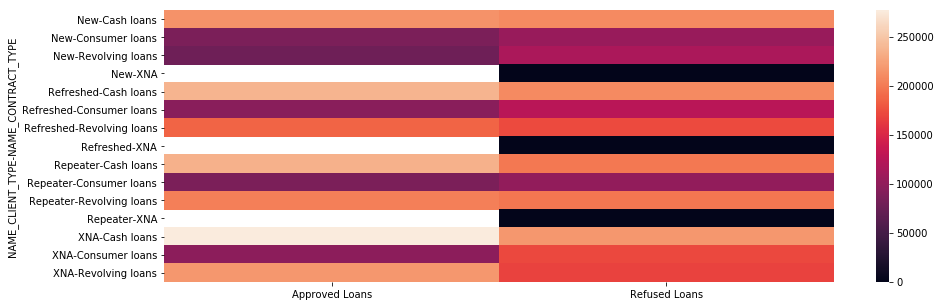

In [53]:
df1 = df_approved.groupby(['NAME_CLIENT_TYPE','NAME_CONTRACT_TYPE'])['AMT_CREDIT'].mean()
df0 = df_refused.groupby(['NAME_CLIENT_TYPE','NAME_CONTRACT_TYPE'])['AMT_CREDIT'].mean()
plt.figure(figsize = (15,5))
df = pd.concat([df1.to_frame(),df0.to_frame()], axis =1, sort=True)
df.columns = ['Approved Loans','Refused Loans']
print(df)
sns.heatmap(df)

### Findings:

- As we can see, if a ```New client is asking for Cash loan``` and the average loan amount is around ```2,30,000``` then the loan <font color='green'>**approval**</font> rate is higher but if the same exceeds ```2,40,000``` then the <font color='red'>**Refusal**</font> rate increases.
- But if a ```Repeat or a Refreshed customer``` asks for a ```Consumer Loan``` and the average loan amount is below ```1,00,000``` then we have a better chance of <font color='green'>**Approvals**</font> but if the same amount is more than ```1,00,000``` then the <font color='red'>**Refusal**</font> rate increases.

### 6.5 Now checking if the average of annuity amount and the client type suite have any impact on the loan status?

                                     Approved Loans  Refused Loans
NAME_CLIENT_TYPE NAME_CONTRACT_TYPE                               
New              Cash loans            21566.314126   23250.775095
                 Consumer loans         9726.335977    9977.925197
                 Revolving loans        4186.726359    6057.654446
                 XNA                            NaN       0.000000
Refreshed        Cash loans            22553.503610   21837.046201
                 Consumer loans        10752.087731   10443.340739
                 Revolving loans       10654.914413    9273.273508
                 XNA                            NaN       0.000000
Repeater         Cash loans            22948.916804   21014.639849
                 Consumer loans         9824.741511    9109.852322
                 Revolving loans       12078.598822   10942.541149
                 XNA                            NaN       0.000000
XNA              Cash loans            26487.629921   20418.36

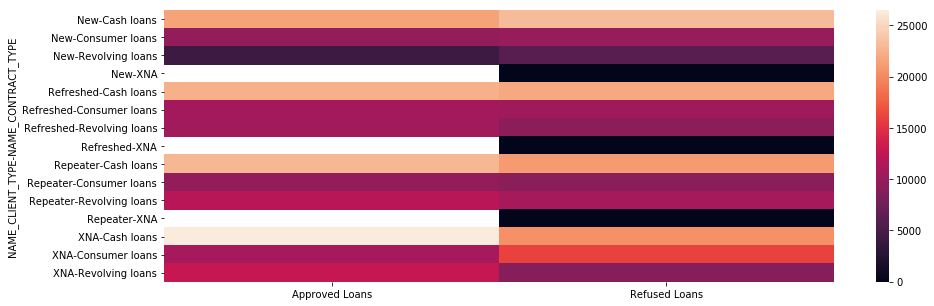

In [54]:
df1 = df_approved.groupby(['NAME_CLIENT_TYPE','NAME_CONTRACT_TYPE'])['AMT_ANNUITY'].mean()
df0 = df_refused.groupby(['NAME_CLIENT_TYPE','NAME_CONTRACT_TYPE'])['AMT_ANNUITY'].mean()
plt.figure(figsize = (15,5))
df = pd.concat([df1.to_frame(),df0.to_frame()], axis =1, sort=True)
df.columns = ['Approved Loans','Refused Loans']
print(df)
sns.heatmap(df)

### Findings:

- As we can see, if a ```New client is asking for Cash loan``` and the average annuity is around ```21000``` or less then the loan <font color='green'>**approval**</font> rate is higher but if the same exceeds ```25000``` then the <font color='red'>**Refusal**</font> rate increases.
- But if a ```Repeat or a Refreshed customer``` asks for a ```Consumer Loan``` and the average annuity amount is below ```10,000``` then we have a better chance of <font color='green'>**Approvals**</font> but if the same amount is more than ```10,000``` then the <font color='red'>**Refusal**</font> rate increases.

# 7. Conclusions

Based on the above analysis we can conclude the following:

Below factors contribute to loan <font color='green'>**Approvals**</font>:

1. The applications should be started on either ``Saturday from 10 am to 1 PM`` or start the application for the clients ``between 9 AM till 4 PM`` on any given day.
2. If the client is asking for ```Cash loan``` and who had come ```Unaccompanied``` to the bank or if a client asks for a ```POS loan who came in with a Family```.
3. If a ```New client is asking for Consumer loan``` or a ``Repeater client asking for Cash loans`` stands a **better** chance for loan <font color='green'>**Approval**</font>.
4. If a ``New client is asking for Cash loan`` and the average loan amount is less than equal to ```2,30,000```.
5. If a ```Repeat or a Refreshed customer``` asks for a ```Consumer Loan``` and the average loan amount is **below** ```1,00,000```.
6. If a ```New client is asking for Cash loan``` and the average annuity is less than ```21,000```.
7. If a ```Repeat or a Refreshed customer```asks for a ```Consumer Loan``` and the average annuity is less than ```10,000```.

Below factors contribute to loan <font color='red'>**Refusals**</font>:

1. When the application is started either ``before 8 AM or after 6 PM`` on any given day.
2. If a ```Repeat customer asks for either a Consumer or a Revolving Loan``` then the <font color='red'>**Refusal**</font> rate is more as compared to others.
3. If a ``New client is asking for Cash loan`` and the average loan amount is **more** than ```2,40,000```
3. If a ```Repeat or a Refreshed customer``` asks for a ```Consumer Loan``` and the average loan amount is above ```1,00,000```. 
4. If a ```New client is asking for Cash loan``` and the average annuity is more than ```25,000```.
4. If a ```Repeat or a Refreshed customer``` asks for a ```Consumer Loan``` and the average annuity is more than ```10,000```.